## Super Store Data Analysis
#### In this project, I analyzed Superstore sales data using various visualizations like bar charts, line plots, scatter plots, and pie charts. The analysis included sales and profit trends by category, sub-category, region, state, and city. I explored how discounts affect profit and identified top-performing and loss-making segments. The project helps understand business patterns and supports data-driven decisions to improve sales and profitability.

In [2]:
#import pandas libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
#load the data
df=pd.read_csv(r"C:\Users\akash\OneDrive\Documents\Sample - Superstore.csv",encoding = 'latin1')

In [4]:
#View the Data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
#check the data type
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object

In [6]:
#check the null values
df.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [7]:
#change the date format
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [8]:
#describe the data
df[['Sales','Quantity','Discount','Profit']].describe().round(2)

,Sales,Quantity,Discount,Profit
count,9994.00,9994.00,9994.00,9994.00
mean,229.86,3.79,0.16,28.66
std,623.25,2.23,0.21,234.26
min,0.44,1.00,0.00,-6599.98
25%,17.28,2.00,0.00,1.73
50%,54.49,3.00,0.20,8.67
75%,209.94,5.00,0.20,29.36
max,22638.48,14.00,0.80,8399.98


In [9]:
#create date differce between two column
df['date_difference'] = (df['Ship Date'] - df['Order Date']).dt.days

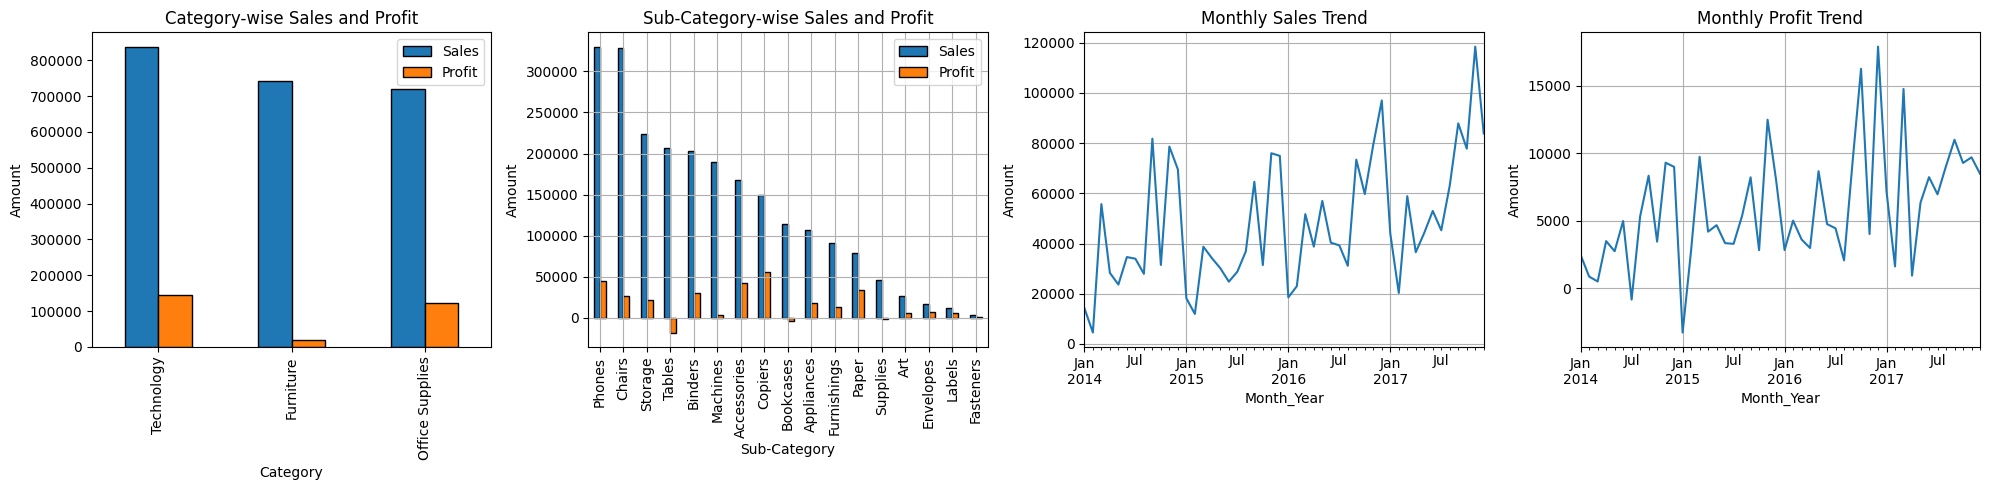

In [10]:
import matplotlib.pyplot as plt

# Create a 1x4 grid of subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Large figure
axs = axs.flatten()  # Flatten 2D array to 1D for easy indexing


# 1. Category-wise Sales and Profit
df1 = df.groupby('Category').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending=False)
df1.plot(kind='bar', ax=axs[0], title='Category-wise Sales and Profit', edgecolor='black')
axs[0].set_ylabel('Amount')

# 2. Sub-Category-wise Sales and Profit
df2 = df.groupby('Sub-Category').agg({'Sales': 'sum', 'Profit': 'sum'}).sort_values('Sales', ascending=False)
df2.plot(kind='bar', ax=axs[1], title='Sub-Category-wise Sales and Profit', edgecolor='black')
axs[1].set_ylabel('Amount')
axs[1].grid()

# 3. Monthly Sales Trend
df['Month_Year'] = df['Order Date'].dt.to_period('M')
df3 = df.groupby('Month_Year')['Sales'].sum()
df3.plot(kind='line', ax=axs[2], title='Monthly Sales Trend')
axs[2].set_ylabel('Amount')
axs[2].grid()

# 4. Monthly Profit Trend
df4 = df.groupby('Month_Year')['Profit'].sum()
df4.plot(kind='line', ax=axs[3], title='Monthly Profit Trend')
axs[3].set_ylabel('Amount')
axs[3].grid()


plt.tight_layout()
plt.show()


### 1.Category-wise Sales and Profit
#### The bar plot shows category-wise sales and profit. The 'Technology' category has the highest sales and profit. The second-highest sales are in the 'Furniture' category; however, its profit is lower than that of 'Office Supplies', which is third in sales.

### 2. Sub-Category-wise Sales and Profit
#### This bar plot shows sales and profit by sub-category, with a total of 17 sub-categories. The top 10 sub-categories by sales are: Phones, Chairs, Storage, Tables, Binders, Machines, Accessories, Copiers, Bookcases, and Appliances.
#### 'Copiers' has the highest profit among all sub-categories, despite having only average sales of around 150,000. The second-highest profit comes from 'Phones', which also records the highest sales in the plot, exceeding 300,000. 'Accessories' ranks third in profit, with average sales slightly above 150,000.
#### Only 'Copiers' shows a profit above 50,000; all other sub-categories have profits below this mark. 'Tables', 'Supplies', and 'Bookcases' show a loss in profit. The lowest sales and profits are observed in 'Art', 'Envelopes', 'Labels', and 'Fasteners'. Interestingly, 'Paper' has the lowest sales but still achieves relatively high profit.

### 3.Monthly Sales Trend
#### This plot uses a line chart, with the x-axis representing Month-Year and the y-axis representing Sales Amount. November 2017 shows the highest sales in the trend, while February 2014 records the lowest. In general, sales tend to be low at the beginning of each year and higher towards the end. This pattern might be due to holiday seasons at the end of the year, which drive higher sales.

### 4. Monthly Profit Trend
#### This plot uses a line chart, with the x-axis representing Month-Year and the y-axis representing Profit Amount. December 2016 shows the highest profit in the trend, nearly 20,000, and also records the second-highest sales. The lowest profit is observed in January 2015, which also has the second-lowest sales in the trend. Overall, profits appear to increase year by year, possibly due to improved business efforts or a growing economy.

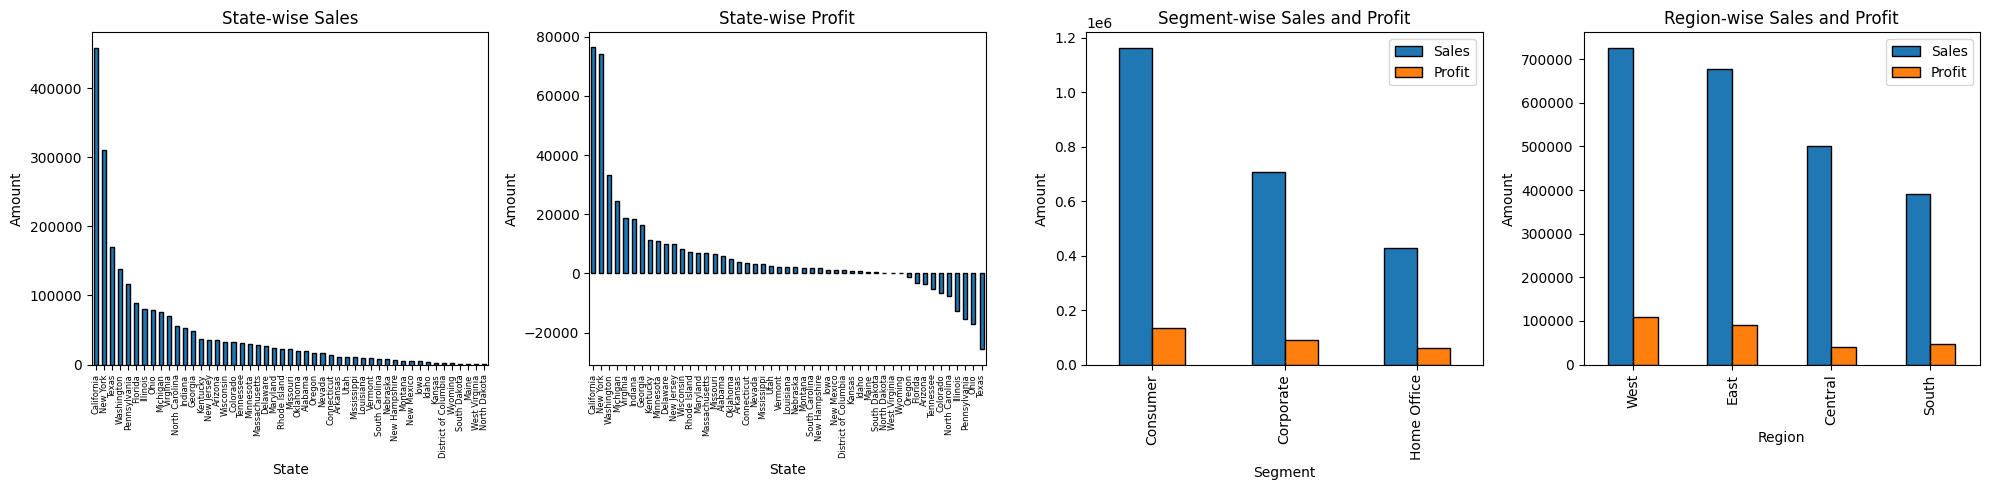

In [11]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Large figure
axs = axs.flatten()  # Flatten 2D array to 1D for easy indexing


# 5. State-wise Sales
df5 = df.groupby('State')['Sales'].sum().sort_values(ascending=False)
df5.plot(kind='bar', ax=axs[0], title='State-wise Sales', edgecolor='black')
axs[0].tick_params(axis='x', labelsize=6)
axs[0].set_ylabel('Amount')

# 6. State-wise Profit
df6 = df.groupby('State')['Profit'].sum().sort_values(ascending=False)
df6.plot(kind='bar', ax=axs[1], title='State-wise Profit', edgecolor='black')
axs[1].tick_params(axis='x', labelsize=6)
axs[1].set_ylabel('Amount')

# 7. Segment-wise Sales and Profit
df7 = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
df7.plot(kind='bar', ax=axs[2], title='Segment-wise Sales and Profit', edgecolor='black')
axs[2].set_ylabel('Amount')

# 8. Region-wise Sales and Profit
df8 = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)
df8.plot(kind='bar', ax=axs[3], title='Region-wise Sales and Profit', edgecolor='black')
axs[3].set_ylabel('Amount')

plt.tight_layout()


### 5.State wise Sales
#### "This bar plot shows state-wise sales. The top 5 states with the highest sales are California, New York, Texas, Washington, and Pennsylvania. The high sales in these states may be due to stronger economies or larger populations. Many other states show significantly lower sales."

### 6.State wise Profit
#### "This bar plot shows state-wise profit. The top 5 states with the highest profit are California, New York, Washington, Michigan, and Virginia. Among these, California, New York, and Washington are also in the top 5 for sales, while Michigan and Virginia have average sales.
#### There are 10 states with profit losses. Texas has the highest loss in profit, despite being the third-highest in sales. Pennsylvania, which ranks fifth in sales, has the third-highest profit loss. The other loss-making states have average sales. A possible reason for these losses could be high discount rates in those regions."

### 7.Segemet wise sales and profit
#### "This multiple bar plot displays segment-wise sales and profit. There are three segments shown in the plot: Consumer, Corporate, and Home Office. The 'Consumer' segment has the highest sales and profit, followed by the 'Corporate' segment. The 'Home Office' segment has the lowest sales and profit. The plot uses two colors—blue for sales and green for profit—as indicated in the legend."


### 8.Region wise  Sales and Profit
#### "This multiple bar chart shows region-wise sales and profit across four regions: East, West, Central, and South. The 'West' region has the highest sales and profit, followed by the 'East' region. The 'Central' region ranks third in sales; however, its profit is lower than that of the 'South' region, which has the lowest sales. The bars are colored blue for sales and green for profit, as indicated in the legend."

In [12]:
#find correlation discount vs profit
correlation = df['Discount'].corr(df['Profit']).round(2)
correlation

np.float64(-0.22)

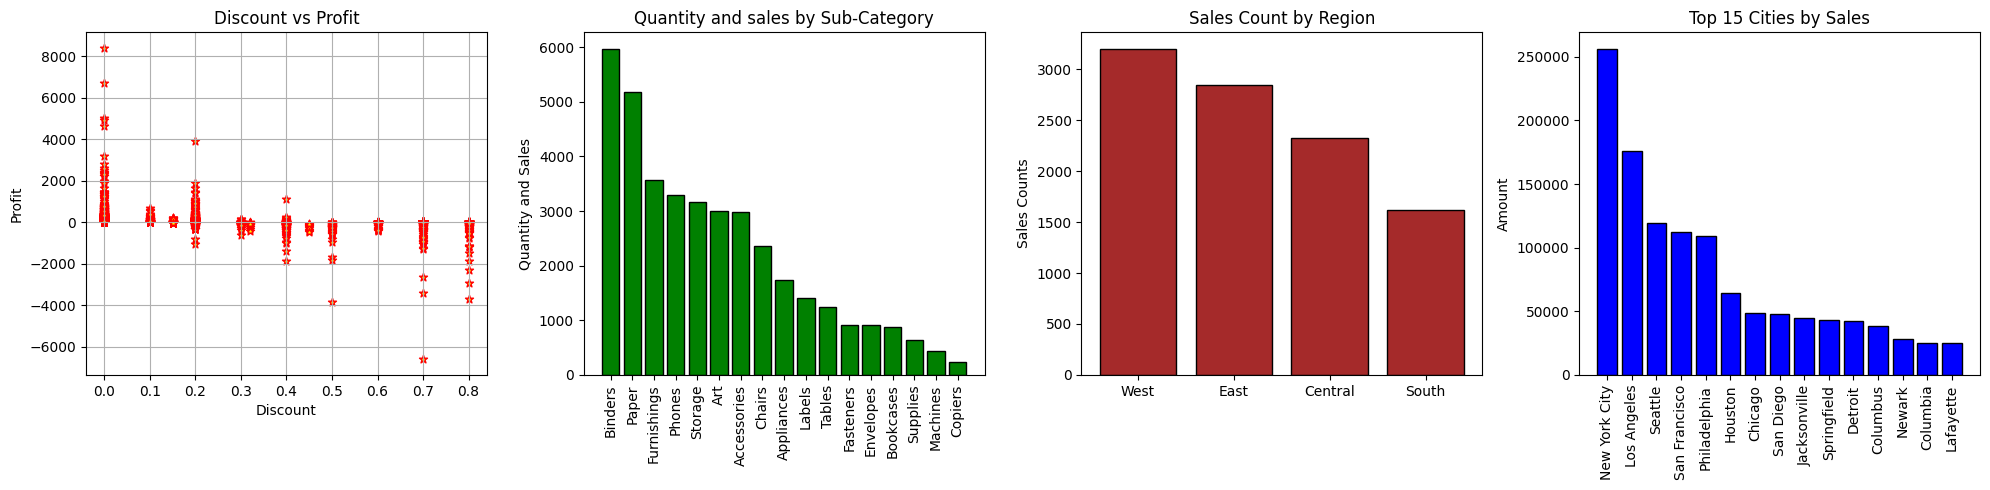

In [26]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Large figure
axs = axs.flatten()  # Flatten 2D array to 1D for easy indexing

# 9. Discount vs Profit Scatter
axs[0].scatter(df['Discount'], df['Profit'], marker='*', edgecolor='red', c='yellow')
axs[0].set_xlabel('Discount')
axs[0].set_ylabel('Profit')
axs[0].set_title('Discount vs Profit')
axs[0].grid()

# 10. Sales of Quantity by Sub Category
df9 = df.groupby('Sub-Category')['Quantity'].sum().reset_index()
df9.sort_values('Quantity', ascending=False, inplace=True)
axs[1].bar(df9['Sub-Category'], df9['Quantity'], edgecolor='black', color='green')
axs[1].set_ylabel('Quantity and Sales')
axs[1].set_title('Quantity and sales by Sub-Category')
axs[1].tick_params(axis='x', rotation=90)

# 11. Sales count by Region
df10 = df['Region'].value_counts().sort_values(ascending=False).reset_index()
df10.columns = ['Region', 'Count']
axs[2].bar(df10['Region'], df10['Count'], edgecolor='black', color='brown')
axs[2].set_ylabel('Sales Counts')
axs[2].set_title('Sales Count by Region')

# 12. Top 15 Cities by Sales
df11 = df.groupby('City')['Sales'].sum().reset_index()
df11.sort_values('Sales', ascending=False, inplace=True)
df11 = df11.iloc[:15]
axs[3].bar(df11['City'], df11['Sales'], edgecolor='black', color='blue')
axs[3].set_ylabel('Amount')
axs[3].set_title('Top 15 Cities by Sales')
axs[3].tick_params(axis='x', rotation=90)

# Final layout
plt.tight_layout()
plt.show()


### 9.Discount Vs Profit
#### "This scatter plot displays the relationship between discount and profit. As the discount increases, profit losses also increase. When the discount is below 0.2, there are generally no profit losses. However, when the discount exceeds 0.2, the data shows consistent profit losses. This indicates that high discounts are a key reason for profit decline."
### Conclusion & Business Insight:
#### To maintain profitability, it's important to limit discounts to below 20% (0.2). Offering higher discounts may boost sales volume but can result in significant profit losses. A better strategy would be to optimize pricing and target discounts only for strategic customer segments or during seasonal sales, rather than applying them broadly.

### 10.Sales of Quantity  by Sub Category
#### "This bar plot shows the quantity of sales by sub-category. The top 5 sub-categories with the highest sales quantity are Binders, Paper, Furnishings, Phones, and Storage. The sub-categories with the lowest sales quantity are Copiers, Supplies, Machines, and Bookcases. The remaining sub-categories show average sales quantities."

### 11. Sales Count by region
#### "This bar plot shows the sales count by region. The 'West' region has the highest sales count, followed by the 'East' and then the 'Central' region. The 'South' region has the lowest sales count."

### 12. Top 15 Cites  Sales
#### "This bar plot shows the top 15 cities by sales. The top 5 cities are New York City, Los Angeles, Seattle, San Francisco, and Philadelphia. New York City has the highest sales, reaching nearly 250,000. Lafayette and Columbia have the lowest sales among the listed cities. The remaining cities show average sales. The high sales in New York may be due to it being a large and major city."

In [27]:
#Find annova Sales Vs Category
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('Sales ~ C(Category)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [ ]:
anova_table

In [28]:
#find annova Sales Vs Segement
model2 = ols('Sales ~ C(Segment)', data=df).fit()
anova_table2 = sm.stats.anova_lm(model2, typ=2)

In [ ]:
anova_table2

C:\Users\akash\AppData\Local\Temp\ipykernel_18660\156318320.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[0].boxplot([df['Sales'],df['Profit'],df['Quantity']],labels = ['Sales','Profit','Quantity'])


<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

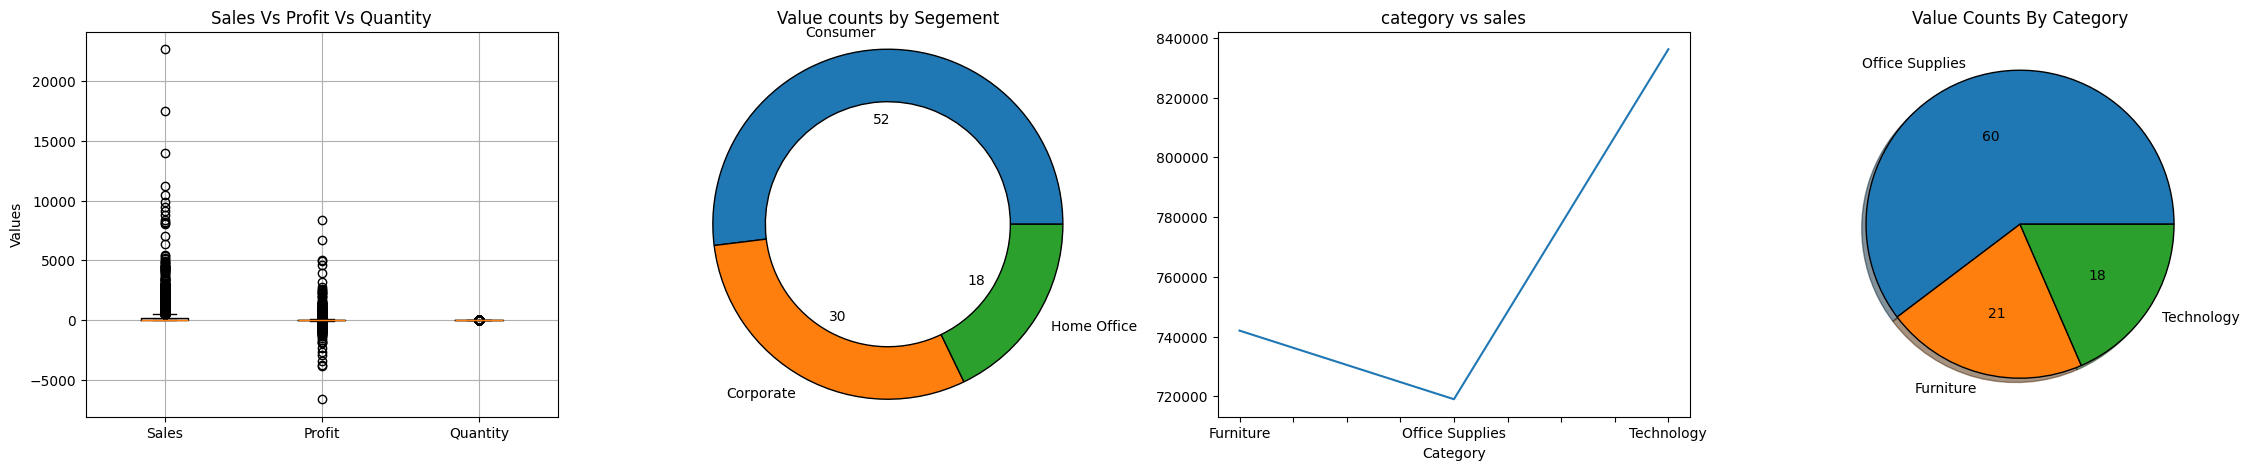

In [25]:
fig, axs = plt.subplots(1,4, figsize=(28, 5))  # Large figure
axs = axs.flatten() 

#13.Sales Vs Profit Vs Quantity
axs[0].boxplot([df['Sales'],df['Profit'],df['Quantity']],labels = ['Sales','Profit','Quantity'])
axs[0].set_title('Sales Vs Profit Vs Quantity')
axs[0].set_ylabel('Values')
axs[0].grid(True)

#14.Value counts by Segement
x = df.Segment.value_counts()
x.plot(kind = 'pie',ax = axs[1],wedgeprops ={'width': 0.3,"edgecolor":"black"},title ='Value counts by Segement',autopct='%.f')
axs[1].axis('equal')
axs[1].set_ylabel('')

#15.category vs sales line plot'
df12 = df.groupby('Category')['Sales'].sum()
df12.plot(kind = 'line',ax = axs[2])
axs[2].set_title('category vs sales')

#16.Value Counts By Category
category_values= df['Category'].value_counts()
category_values.plot(kind = 'pie',shadow = True,ax=axs[3],wedgeprops={"edgecolor":"black"},title = 'Value Counts By Category',autopct='%.f')
axs[3].set_ylabel('')

plt.tight_layout

### 13.Sales Vs Profit Vs Quantity
#### Sales values are all positive, with high average and minimum values but relatively small maximum values. Profit includes both gains and losses, ranging from around –5000 to +10000.Quantity is always above zero, showing variation but no zero values. Overall, profit is more variable, while sales and quantity are consistently positive.

### 14.Value Counts By Segement

#### The donut chart shows segment distribution using value counts. Consumer (blue) has the highest count, followed by Corporate (orange), and Home Office (green) has the lowest.Each segment is clearly represented by a distinct color.Consumer dominates the chart, indicating it’s the most frequent segment.

### 15.Category Vs Sales

#### "This line plot shows sales by category. There are three categories in total: Furniture, Office Supplies, and Technology. The highest sales are in the Technology category, with nearly 840,000. Furniture follows with sales above 740,000. The lowest sales are in the Office Supplies category, with around 720,000."

### 16.Value counts by Category
#### "This pie chart displays value counts by category. There are three categories: Furniture, Technology, and Office Supplies. 'Office Supplies' has the highest count, making up 60% of the total. 'Furniture' is second with 21%, and 'Technology' has the lowest share at 18%."


